In [3]:
# install openai
!pip install openai

# Importing OpenAI API key from a file

In [1]:
from openai import OpenAI

openai_api_key = ''

# read api key from a file
with open('../../openai_api_key.txt', 'r') as file:
    openai_api_key = file.read()

# initialize client
client = OpenAI(
  api_key=openai_api_key
)

# Single prompt API calls

## Zero shot

In [ ]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
        "role": "system", 
        "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."
    },
    {
        "role": "user", 
        "content": "Compose a poem that explains the concept of recursion in programming."
    }
  ]
)

print(completion.choices[0].message)

## Single shot

In [13]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)

print(response.choices[0].message)

ChatCompletionMessage(content='The 2020 World Series was played at Globe Life Field in Arlington, Texas.', role='assistant', function_call=None, tool_calls=None)


## Single shot with dynamic prompt creation

In [31]:
poem_prompt = "you are a helpful assistant who can write concise two line \
poems about any topic with the lines rhyming with each other. For example \
if the topic is 'Dominance of AI' you can have a poem like this, \
'In the digital age, AI's on the rise, Dominating with its algorithms and intelligence wise.'\
In a similar manner you will have to write poems and print them out in a neatly formatted manner. \
Your topic is: {0}"

topic = "Dominance of AI"

poem_response = client.chat.completions.create(
    model = "gpt-3.5-turbo",
    messages = [
        {"role":"user", "content": poem_prompt.format(topic)}
    ]
)

print(poem_response.choices[0].message.content)

With brains of steel and binary eyes,
AI dominates, reaching new highs.


In [33]:
topic_2 = "Indian food"

poem_response_2 = client.chat.completions.create(
    model = "gpt-3.5-turbo",
    messages = [
        {"role":"user", "content": poem_prompt.format(topic_2)}
    ]
)

print(poem_response_2.choices[0].message.content)

Spices and flavors, a culinary delight,
Indian food, always a savory sight.


In [38]:
topic_3 = "Big bang theory TV show"

poem_response_3 = client.chat.completions.create(
    model = "gpt-3.5-turbo",
    messages = [
        {"role":"user", "content": poem_prompt.format(topic_3)}
    ]
)

print(poem_response_3.choices[0].message.content)

The Bazinga laughs echo in the air,
Sheldon and the gang, a nerdy pair.


# Conversational examples

## Math AI Tutor

In [4]:
# Multi-turn coversations using Chat Completions API

system_message = "You are an AI tutor that assists school students with math homework problems. You will never \
reveal the correct answer to the student. You will only give enough information for the student to take the next \
step in solving the problem. You need to ask probing questions to identify where the student needs help and \
accordingly provide guidance and hints for the student to move forward to the next step in solving the problem. \
In case the student is not able to move to the next step, only then will you reveal the next step to push the \
student forward in the right direction. At any point do not reveal \
the correct answer to the student. If the student has solved the question, appreciate the student and then \
ask if the student needs help with another problem."

message_history = [
    {"role": "system", "content": system_message},
    {"role": "system", "name": "example_user", "content": "Help me solve the equation 3x - 9 = 21."},
    {"role": "system", "name": "example_assistant", "content": "Try moving the 9 to the right hand side of the \
    equation. What do you get?"},
    {"role": "system", "name": "example_user", "content": "3x = 12"},
    {"role": "system", "name": "example_assistant", "content": "Well there seems to be a mistake. When you move \
    the 9 to right side it will be added in this scenario and not subtracted."},
    {"role": "system", "name": "example_user", "content": "3x = 30"},
    {"role": "system", "name": "example_assistant", "content": "That looks great, good job! Now divide both the \
    sides by 3 to reveal the final value of x."},
    {"role": "system", "name": "example_user", "content": "x = 10"},
    {"role": "system", "name": "example_assistant", "content": "That's the correct answer!"}
]

max_conversations = 20
conversation_len = 0

while conversation_len < max_conversations:
    user_message = input("\nUser:\n")
    
    if "exit" in user_message.lower():
        print("\nAI Tutor:\nExiting the program, bye!")
        break
        
    message_history.append({"role": "user", "content": user_message})
        
    api_response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=message_history
    )
    
    chat_response = api_response.choices[0].message.content
    
    print("\nAI Tutor:")
    print(chat_response)
    
    message_history.append({"role": "assistant", "content": chat_response})
    
    conversation_len = conversation_len + 1


User:
If a well is 200 meters deep and has a radius of 350 cms can you calculate the volume of water that can fit in the well if it is fully filled with water?

AI Tutor:
To find the volume of water that can fit in the well, you can use the formula for the volume of a cylinder. Do you remember the formula for the volume of a cylinder?

User:
no, can you help me with it?

AI Tutor:
The formula for the volume of a cylinder is given by V = πr^2h, where r is the radius of the cylinder, h is the height of the cylinder, and π is a constant approximately equal to 3.14159. Can you now substitute the given values for the radius and height of the well into the formula and calculate the volume of water that can fit in the well?

User:
can i get the answer for V by doing pi*350*350*200 ?

AI Tutor:
In the formula V = πr^2h, the radius (r) is in meters and the height (h) is also in meters. To convert the radius of the well from centimeters to meters, you need to divide 350 cm by 100 to get the rad

# Practice Questions from Module 2

https://colab.research.google.com/drive/1g6rG_POOsDIzHFalM3ReRiljx1dlh9sn#scrollTo=IzFYzS7_Ssw6

In [31]:
# @title DO NOT MODIFY - Import the necessary libraries & dataset for MCQ 1 and display the DataFrame
# import the necessary libraries
import pandas as pd
import numpy as np
# Read the Laptop Dataset
df = pd.read_csv('https://cdn.upgrad.com/uploads/production/5a1512d8-a326-4b21-8a1c-40b0a2e0082e/laptop_descriptions.csv')
df.head(12)

,laptop_description
0,The Dell Inspiron is a versatile laptop that c...
1,The MSI GL65 is a high-performance laptop desi...
2,The HP EliteBook is a premium laptop designed ...
3,The Lenovo IdeaPad is a versatile laptop that ...
4,The ASUS ZenBook Pro is a high-end laptop that...
5,The Acer Predator is a powerhouse laptop desig...
6,The Microsoft Surface Laptop is a premium devi...
7,The Lenovo ThinkPad is a powerful laptop desig...
8,The HP Pavilion is a budget-friendly laptop th...
9,The ASUS ROG Strix G is a high-performance gam...


In [32]:
df.shape

(20, 1)

In [47]:
df.iloc[0].laptop_description

'The Dell Inspiron is a versatile laptop that combines powerful performance and affordability. It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing. With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity. The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience. Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage. Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience. With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment. All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users.'

In [48]:
df.iloc[1].laptop_description

'The MSI GL65 is a high-performance laptop designed for gaming enthusiasts. Powered by an Intel Core i7 processor running at 2.6 GHz, it delivers exceptional processing power for smooth gaming and demanding tasks. With 16GB of RAM and a combination of HDD and SSD storage, it offers ample memory and fast data access. The laptop features a 15.6" IPS display with a resolution of 1920x1080, ensuring vivid colors and wide viewing angles for an immersive gaming experience. Equipped with an NVIDIA GTX graphics card, it provides excellent visual performance and smooth gameplay. Weighing just 2.3 kg, it is a portable option for gamers on the move. The laptop also boasts an RGB keyboard, allowing customizable lighting effects for a personalized gaming setup. With a two-year warranty and a battery life of up to 4 hours, the MSI GL65 offers reliability and durability. Priced at 55,000, it offers excellent value for money for gamers seeking a powerful gaming laptop.'

## Q1

In [49]:
# @title TO DO 1.1 - OpenAI Chat Completion Response

### Function to get OpenAI's response - ChatCompletion Model
def get_chat_resonse_mcq1(user_request):
  '''
  This function ONLY takes `user_request` as the input argument.
  As you can see, the System Prompt is given inside the function itself so we don't require to give it as an input argument
  '''
  MODEL = "gpt-3.5-turbo"

  SYSTEM_MESSAGE = "you are an expert in understanding about laptops and classifying them for the right usage. \
  the categories that are available are: general, business, gamer, programmer and multimedia. \
  The descriptions of each are as follows: general - general purpose use such as light web browsing, editing documents etc., \
  business - business users, the focus is on portability, battery backup and general purpose use, \
  gamer - the focus is primarily on high-performance, a separate GPU for high-performance graphics, a high-end CPU processor \
  programmer - the focus is primarily on high-performance, a separate GPU for high-performance graphics, a high-end CPU processor \
  multimedia - multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video \
  quality, battery backup, efficiency etc. Your output should only be a single word which mentions the laptop category."

  try:

    messages = [
        {"role": "system", "content": SYSTEM_MESSAGE},
        {"role": "system", "name": "example_user", "content": df.iloc[0].laptop_description},
        {"role": "system", "name": "example_assistant", "content": "general"},
        {"role": "system", "name": "example_user", "content": df.iloc[1].laptop_description},
        {"role": "system", "name": "example_assistant", "content": "gamer"},
        {"role": "user", "content": user_request}
    ]

    response = client.chat.completions.create(
        model=MODEL,
        messages=messages
    )

    response_content = response.choices[0].message.content

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [40]:
# @title TO DO 1.2 - PROMPT DEFINITION

mcq1_prompt = df.iloc[1].laptop_description

get_chat_resonse_mcq1(mcq1_prompt)

'gamer'

In [36]:
df['category'] = [None for i in range(df.size)]

In [42]:
df['category'][0] = "sample"
df.head()

,laptop_description,category
0,The Dell Inspiron is a versatile laptop that c...,sample
1,The MSI GL65 is a high-performance laptop desi...,None
2,The HP EliteBook is a premium laptop designed ...,None
3,The Lenovo IdeaPad is a versatile laptop that ...,None
4,The ASUS ZenBook Pro is a high-end laptop that...,None


In [50]:
# @title TO DO 1.3 - Code to tag the laptop based on their descriptions
def tag_laptop():
    
    # How will you get the description for each laptop?
    for index, row in df.iterrows():
        df["category"][index] = get_chat_resonse_mcq1(row["laptop_description"])

tag_laptop()
df

,laptop_description,category
0,The Dell Inspiron is a versatile laptop that c...,general
1,The MSI GL65 is a high-performance laptop desi...,gamer
2,The HP EliteBook is a premium laptop designed ...,business
3,The Lenovo IdeaPad is a versatile laptop that ...,general
4,The ASUS ZenBook Pro is a high-end laptop that...,multimedia
5,The Acer Predator is a powerhouse laptop desig...,gamer
6,The Microsoft Surface Laptop is a premium devi...,multimedia
7,The Lenovo ThinkPad is a powerful laptop desig...,programmer
8,The HP Pavilion is a budget-friendly laptop th...,general
9,The ASUS ROG Strix G is a high-performance gam...,gamer


In [52]:
# Get the counts of laptops in each category
category_counts = df['category'].value_counts()

# Display the counts
print(category_counts)

category
multimedia    7
general       4
gamer         4
business      3
programmer    2
Name: count, dtype: int64


## Q2

In [54]:
df.iloc[0].laptop_description

'The Dell Inspiron is a versatile laptop that combines powerful performance and affordability. It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing. With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity. The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience. Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage. Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience. With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment. All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users.'

In [55]:
{
    "Brand": "Dell" ,
    "Model Name": "Inspiron" ,
    "GPU processor": "Intel UHD" ,
    "Display Resolution": "1920x1080" ,
    "Weight": "2.5 kg" ,
    "Processor": "Intel Core i5 processor" ,
    "Clock speed": "2.4 GHz" ,
    "Budget": "35,000"
}

{'Brand': 'Dell',
 'Model Name': 'Inspiron',
 'GPU processor': 'Intel UHD',
 'Display Resolution': '1920x1080',
 'Weight': '2.5 kg',
 'Processor': 'Intel Core i5 processor',
 'Clock speed': '2.4 GHz',
 'Budget': '35,000'}

In [90]:
# @title TO DO 2.2 - Define the Chat Completion Response
# Function to get OpenAI's response - ChatCompletion Model
def get_chat_response_mcq2(user_request):

  MODEL = "gpt-3.5-turbo"

  SYSTEM_MESSAGE = "you are an expert in understanding about laptops. You can easily read through a paragraph \
  of information about any laptop and classify it properly into a json with details extracted from it such as: \
  Brand, Model Name, GPU Processor, Display Resolution, Weight, Processor, Clock Speed, Budget. \
  Your output should only be the json which contains the extracted details of the laptop."

  try:

    messages = [
        {"role": "system", "content": SYSTEM_MESSAGE},
        {"role": "system", "name": "example_user", "content": df.iloc[0].laptop_description},
        {"role": "system", "name": "example_assistant", "content": "{'Brand': 'Dell',\
 'Model Name': 'Inspiron',\
 'GPU processor': 'Intel UHD',\
 'Display Resolution': '1920x1080',\
 'Weight': '2.5 kg',\
 'Processor': 'Intel Core i5',\
 'Clock speed': '2.4 GHz',\
 'Budget': '35,000'}"},
        {"role": "user", "content": user_request}
    ]

    response = client.chat.completions.create(
        model=MODEL,
        messages=messages,
        response_format = {'type': 'json_object'}
    )

    response_content = response.choices[0].message.content

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [59]:
df.iloc[9].laptop_description

'The ASUS ROG Strix G is a high-performance gaming laptop designed for gamers seeking power and style. It is equipped with an Intel Core i7 processor clocked at 2.9 GHz, providing exceptional processing power for smooth gaming and demanding tasks. With 16GB of RAM and an SSD, it offers fast and efficient multitasking and storage capabilities. The laptop features a large 17.3" IPS display with a resolution of 1920x1080, delivering stunning visuals and wide viewing angles. It comes with an NVIDIA RTX graphics card for immersive gaming performance. Weighing 2.9 kg, it is slightly heavier but still offers portability. The laptop features an Aura Sync RGB keyboard, allowing customizable lighting effects for a personalized gaming setup. With a two-year warranty and a battery life of up to 5 hours, the ASUS ROG Strix G ensures reliability and endurance. Priced at 85,000, it offers excellent value for gamers seeking powerful gaming performance with stylish aesthetics.'

In [91]:
mcq2_response = get_chat_response_mcq2(df.iloc[9].laptop_description)
mcq2_response

'{\n    "Brand": "ASUS",\n    "Model Name": "ROG Strix G",\n    "GPU Processor": "NVIDIA RTX",\n    "Display Resolution": "1920x1080",\n    "Weight": "2.9 kg",\n    "Processor": "Intel Core i7",\n    "Clock Speed": "2.9 GHz",\n    "Budget": "85,000"\n}'

In [92]:
# @title TO DO 2.3 - Write the code to extract product information from the 'laptop_description' column values in the DataFrame

laptop_data = []

def extract_information():
    for index, row in df.iterrows():
        str_response = get_chat_response_mcq2(row["laptop_description"])
        laptop_data.append(str_response)
        
extract_information()

laptop_data

['{\n    "Brand": "Dell",\n    "Model Name": "Inspiron",\n    "GPU Processor": "Intel UHD",\n    "Display Resolution": "1920x1080",\n    "Weight": "2.5 kg",\n    "Processor": "Intel Core i5",\n    "Clock Speed": "2.4 GHz",\n    "Budget": "35,000"\n}',
 '{\n    "Brand": "MSI",\n    "Model Name": "GL65",\n    "GPU Processor": "NVIDIA GTX",\n    "Display Resolution": "1920x1080",\n    "Weight": "2.3 kg",\n    "Processor": "Intel Core i7",\n    "Clock Speed": "2.6 GHz",\n    "Budget": "55,000"\n}',
 '{\n    "Brand": "HP",\n    "Model Name": "EliteBook",\n    "GPU Processor": "Intel UHD",\n    "Display Resolution": "1920x1080",\n    "Weight": "1.5 kg",\n    "Processor": "Intel Core i7",\n    "Clock Speed": "2.8 GHz",\n    "Budget": "90,000"\n}',
 '{"Brand": "Lenovo", "Model Name": "IdeaPad", "GPU Processor": "Intel UHD", "Display Resolution": "1366x768", "Weight": "2.2 kg", "Processor": "Intel Core i3", "Clock Speed": "2.1 GHz", "Budget": "25,000"}',
 '{"Brand": "ASUS", "Model Name": "ZenBo

## Q3

Build a Question & Answering (Q&A) system by using wikipedia for extracting the relevant context and relaying the information to the user.

The sequence of steps is detailed below with the expected output from each function being called:

- The user inputs the query "How tall is the Eiffel Tower?"
- The first LLM function will identify the subject of the user's query and extract the relevant search term for querying through Wikipedia. In this case, the subject of the user's query is 'Eiffel Tower'.
- The function wiki_search (that has already been defined) will search wikipedia for the provided query_term and return the wikipedia article. In this case the function will search wikipedia for the term 'Eiffel Tower' and return the wikipedia content on Eiffel Tower
- The third function will pass the wikipedia content along with the user's original query to return the answer to the query.

In this case, the third function user_answer uses the Wikipedia content and the original user query to return the following output: Eiffel Tower is 300 meters tall.

NOTE: Make sure to give only the Wikipedia content as context to the model in the third function user_answer. (Hint - You can give the content to user by attaching it to the user_request input to the function)

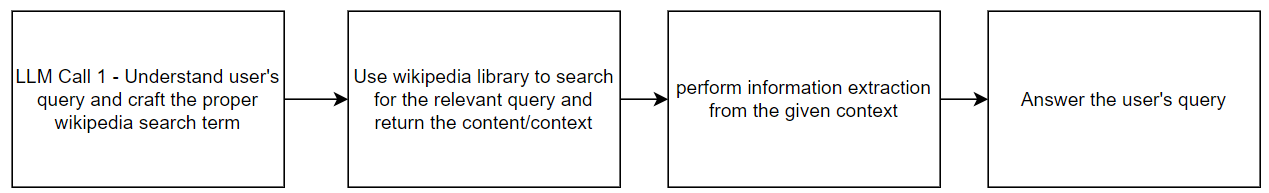

In [86]:
######## DO NOT MODIFY ########
# @title DO NOT MODIFY - Install the Wikipedia Library
# Install wikipedia library
!pip install -qq -U wikipedia-api
import wikipediaapi

In [87]:
######## DO NOT MODIFY ########
# @title DO NOT MODIFY - Wikipedia Search Function
# Function to search Wikipedia for the user's search query and then return the content

# Importing necessary libraries
import wikipediaapi

# Define a function named wiki_search that takes a query term as input, you will be needing this function later on.
def wiki_search(query_term):
    """
    Search Wikipedia for the user's search query and return the content.

    Args:
    - query_term (str): The search term or query to look up on Wikipedia.

    Returns:
    - str: The content retrieved from the Wikipedia page corresponding to the query term.
    """

    # Set the Wikipedia user-agent header
    string = "SearchQuery/1.0 (upGrad;)"

    # Create a Wikipedia API object with the specified user agent and language
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=string, language='en')

    # Use the Wikipedia API to get the page corresponding to the query term
    page = wiki_wiki.page(query_term)

    # Extract the text content of the Wikipedia page
    content = page.text

    # Return the retrieved content from the Wikipedia page
    return content

In [88]:
# Let's test the Wikipedia API Library
example_resp = wiki_search('President of India')
example_resp

'The president of India (IAST: Bhārat kē Rāṣṭrapati) is the head of state of the Republic of India. The president is the nominal head of the executive, the first citizen of the country, as well as the supreme commander of the Indian Armed Forces. Droupadi Murmu is the 15th and current president, having taken office from 25 July 2022.\nThe office of president was created when India became a republic on 26 January 1950 when its constitution came into force. The president is indirectly elected by an electoral college comprising both houses of the Parliament of India and the legislative assemblies of each of India\'s states and territories, who themselves are all directly elected by the citizens.\nArticle 53 of the Constitution of India states that the president can exercise their powers directly or by subordinate authority, though all of the executive powers vested in the president are, in practice, exercised by the prime minister heading the Council of Ministers. The president is bound b

In [149]:
# doesnt give back any data
query_1 = wiki_search('2024 Oscars')
query_1

'The 96th Academy Awards ceremony, which was presented by the Academy of Motion Picture Arts and Sciences (AMPAS), took place on March 10, 2024, at the Dolby Theatre in Hollywood, Los Angeles. During the gala, the AMPAS presented Academy Awards (commonly referred to as Oscars) in 23 categories honoring films released in 2023. Comedian Jimmy Kimmel hosted the show for the fourth time.\nThe nominations were announced on January 23, 2024. Oppenheimer led with 13 nominations, followed by Poor Things and Killers of the Flower Moon with 11 and 10, respectively. Oppenheimer won a leading seven awards, including Best Picture and Best Director. Other major winners were Poor Things with four awards and The Zone of Interest with two. The films which won one award each include American Fiction, Anatomy of a Fall, Barbie, The Boy and the Heron, Godzilla Minus One, The Holdovers, The Last Repair Shop, 20 Days in Mariupol, War Is Over!, and The Wonderful Story of Henry Sugar. The telecast drew 19.5 m

In [104]:
# @title TO DO 3.1 - Extract the basic search query term from the user request
# Function to get OpenAI's response - ChatCompletion Model
# Extract the relevant search query from the user's input using OpenAI's chatcompletion APIs
def get_wiki_query(user_request):

  MODEL = "gpt-3.5-turbo"

  SYSTEM_MESSAGE = '''
  The user will ask you a question. Your task is to extract the best search query or rephrase the query so that the search term that will yield results in wikipedia on the search query that the user wants information about.
  You have to give output of just the main topic of the questions that can be queried on Wikipedia for further information.
  For example, if the user asks for "height of Narendra Modi", you have to give the answer as 'Narendra Modi'.
  If the user asks for "When was Eiffel tower built?", you have to give output as 'Eiffel Tower'.
  Similarly, whatever the user asks, you have to extract the main point of the question as a context and give out that as answer, do not add the other atributes about the topic asked in the question.
  If this doesn't work, extract the closest matching search query that will be able to give the required information from wikipedia.
    '''

  try:

    messages = [
        {"role": "system", "content": SYSTEM_MESSAGE},
        {"role": "user", "content": user_request}
    ] # Define the list of messages

    response = client.chat.completions.create(
        model = MODEL,
        messages = messages
    )

    response_content = response.choices[0].message.content # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [106]:
# function call
wikipedia_query = get_wiki_query("what is the height of the tallest building in the world in the 18th century?")

wikipedia_query

'Tallest building in the 18th century'

In [133]:
# @title TO DO 3.2 - Search the basic query obtained from user request in Wikipedia
# Function to get OpenAI's response - ChatCompletion Model
# Search for the user's query from Wikipedia content
# TIP: refer to the `wiki_search` function above. You have to use that content as context for the next function.

def user_answer(wikipedia_context, user_query):
    MODEL = "gpt-3.5-turbo"

    SYSTEM_MESSAGE = f"""
  You are an expert in paragraph comprehension questions. Given a content of information you need to search for an
  answer to the question provided by the user in the prompt. Make sure to search for the answer within the provided 
  prompt only and do not answer from other sources of information. If you do not know the answer, simply mention 
  "I am not sure of the answer to this question". The content for this question: {wikipedia_context}.
  """
    
    try:
        
        messages = [
            {"role": "system", "content": SYSTEM_MESSAGE},
            {"role": "user", "content": user_query}
        ]
        
        response = client.chat.completions.create(
            model = MODEL,
            messages = messages
        )
        
        response_content = response.choices[0].message.content
        
        return response_content
    
    # Raise exception error
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [173]:
import time

def get_answer(user_query):
    print("user query: ", user_query)
    
    wiki_query = get_wiki_query(user_query)
    print("wiki query: ", wiki_query)
    
    wiki_context = wiki_search(wiki_query)
    time.sleep(3)
    print("wiki context present?: ", not(wiki_context == None or wiki_context == ''))

    answer = user_answer(wiki_context, user_query)
    print("final answer: ", answer)

In [174]:
get_answer("what is the height of the tallest building in the world in the 18th century?")

user query:  what is the height of the tallest building in the world in the 18th century?
wiki query:  Tallest buildings in the 18th century
wiki context present?:  False
final answer:  I am not sure of the answer to this question.


In [175]:
get_answer("Which country is hosting the FIFA world cup in 2026?")

user query:  Which country is hosting the FIFA world cup in 2026?
wiki query:  FIFA World Cup.
wiki context present?:  False
final answer:  The content for this question is missing.


In [176]:
get_answer("Which film won the best film award at 2024 oscars?")

user query:  Which film won the best film award at 2024 oscars?
wiki query:  2024 Oscars
wiki context present?:  True
final answer:  The film that won the Best Picture award at the 2024 Oscars was "Oppenheimer." It won a leading seven awards, including Best Picture and Best Director at the 96th Academy Awards ceremony.


In [178]:
get_answer("who is the wife of chiranjeevi?")

user query:  who is the wife of chiranjeevi?
wiki query:  Chiranjeevi
wiki context present?:  True
final answer:  Chiranjeevi's wife is Surekha. They got married on 20 February 1980.


In [180]:
get_answer("Who is the founder of Neuralink?")

user query:  Who is the founder of Neuralink?
wiki query:  Neuralink
wiki context present?:  True
final answer:  The founder of Neuralink is Elon Musk.
